## Get Differences Between Implementation Smells

In [26]:
def remove_outliers(df, threshold=3, columns=None):
    """
    Remove outliers from DataFrame using Z-score method.
    
    Parameters:
    - df: Input pandas DataFrame.
    - threshold: Z-score threshold for outlier detection (default: 3).
    - columns: List of columns to apply outlier removal (default: all columns).
    
    Returns:
    - DataFrame with outliers removed.
    """
    # Select columns if specified, otherwise use all columns
    if columns is None:
        columns = df.columns
    
    # Calculate Z-scores for selected columns
    z_scores = df[columns].apply(lambda x: (x - x.mean()) / x.std())
    
    # Filter out rows with outliers
    filtered_df = df[(z_scores.abs() < threshold).all(axis=1)]
    
    return filtered_df

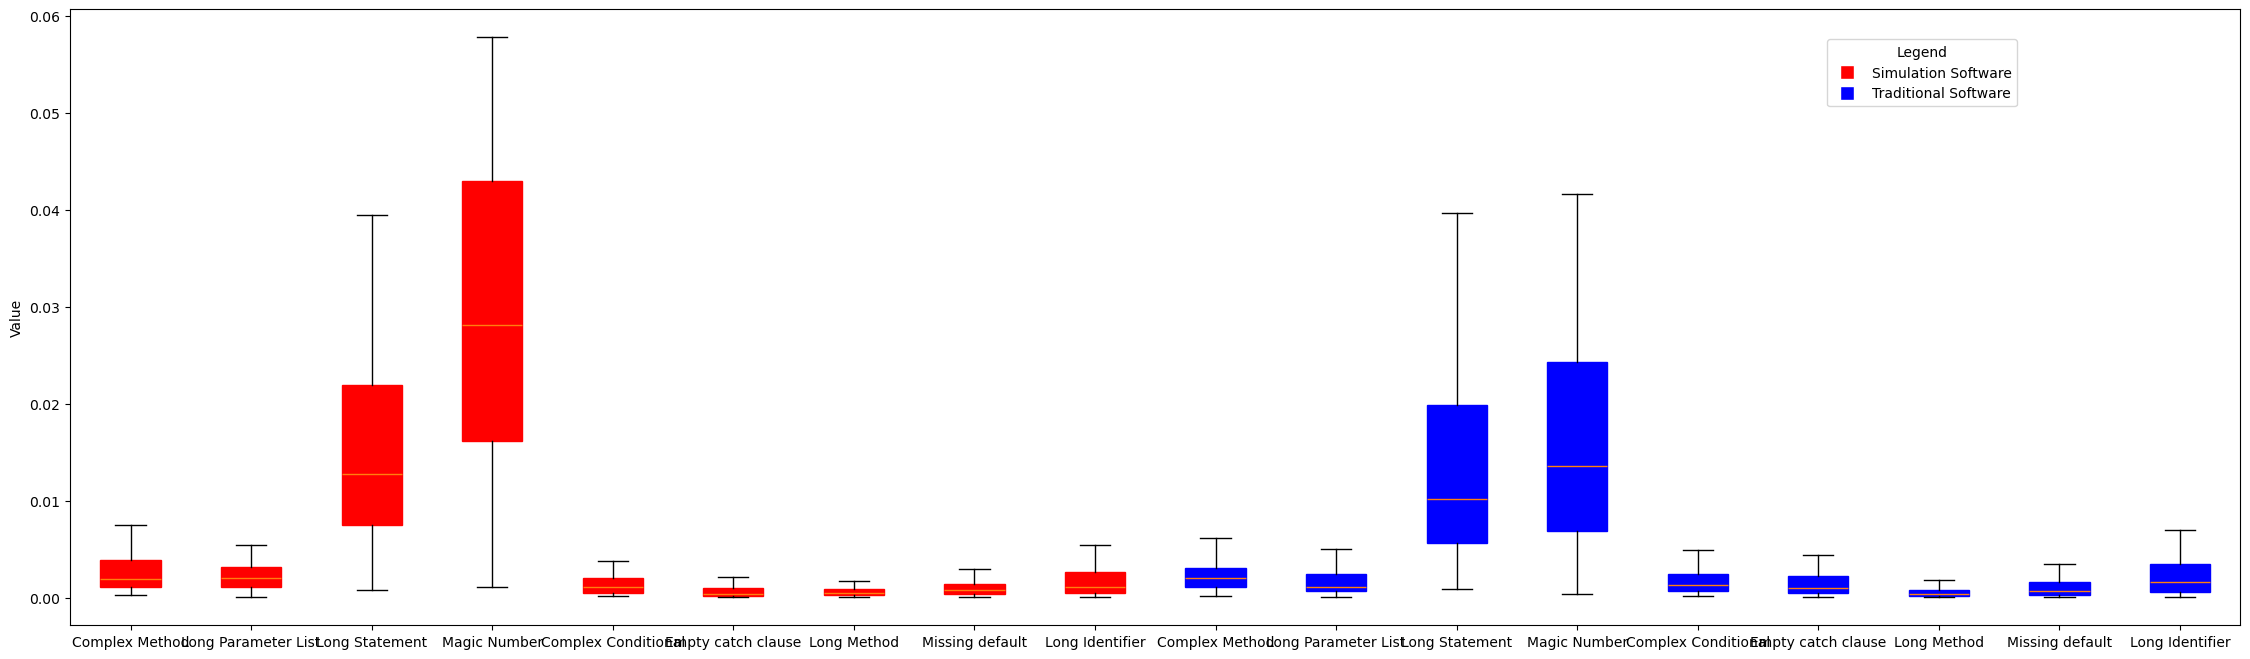

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

fig, ax = plt.subplots(figsize=(28, 8))
box1 = ax.boxplot([migsdf_g1[migsdf_g1['Implementation Smell']=='Complex Method']['Avg'], migsdf_g1[migsdf_g1['Implementation Smell']=='Long Parameter List']['Avg'], migsdf_g1[migsdf_g1['Implementation Smell']=='Long Statement']['Avg'], migsdf_g1[migsdf_g1['Implementation Smell']=='Magic Number']['Avg'], migsdf_g1[migsdf_g1['Implementation Smell']=='Complex Conditional']['Avg'], migsdf_g1[migsdf_g1['Implementation Smell']=='Empty catch clause']['Avg'], migsdf_g1[migsdf_g1['Implementation Smell']=='Long Method']['Avg'], migsdf_g1[migsdf_g1['Implementation Smell']=='Missing default']['Avg'], migsdf_g1[migsdf_g1['Implementation Smell']=='Long Identifier']['Avg']],
                  labels=["Complex Method", "Long Parameter List", "Long Statement", "Magic Number", "Complex Conditional", "Empty catch clause", "Long Method", "Missing default", "Long Identifier" ], positions=[1, 2, 3,4,5,6,7,8,9],
                  patch_artist=True, boxprops=dict(facecolor="red", color="red"), showfliers=False)

box2 = ax.boxplot([migtdf_g1[migtdf_g1['Implementation Smell']=='Complex Method']['Avg'], migtdf_g1[migtdf_g1['Implementation Smell']=='Long Parameter List']['Avg'], migtdf_g1[migtdf_g1['Implementation Smell']=='Long Statement']['Avg'], migtdf_g1[migtdf_g1['Implementation Smell']=='Magic Number']['Avg'], migtdf_g1[migtdf_g1['Implementation Smell']=='Complex Conditional']['Avg'], migtdf_g1[migtdf_g1['Implementation Smell']=='Empty catch clause']['Avg'], migtdf_g1[migtdf_g1['Implementation Smell']=='Long Method']['Avg'], migtdf_g1[migtdf_g1['Implementation Smell']=='Missing default']['Avg'], migtdf_g1[migtdf_g1['Implementation Smell']=='Long Identifier']['Avg']],
                  labels=["Complex Method", "Long Parameter List", "Long Statement", "Magic Number", "Complex Conditional", "Empty catch clause", "Long Method", "Missing default", "Long Identifier" ], positions=[10,11, 12, 13,14,15,16,17,18],
                  patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), showfliers=False)

# plt.ylim(0, 0.3)

# Create a custom legend
legend_labels = ['Simulation Software', 'Traditional Software']
legend_colors = ['red', 'blue']
custom_legend = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
                 for label, color in zip(legend_labels, legend_colors)]

# Add the legend to the figure
fig.legend(handles=custom_legend, loc='lower left', bbox_to_anchor=(0.75, 0.75), title="Legend")

plt.ylabel('Value')
plt.title('')
plt.savefig("Implementation comparison2.png")

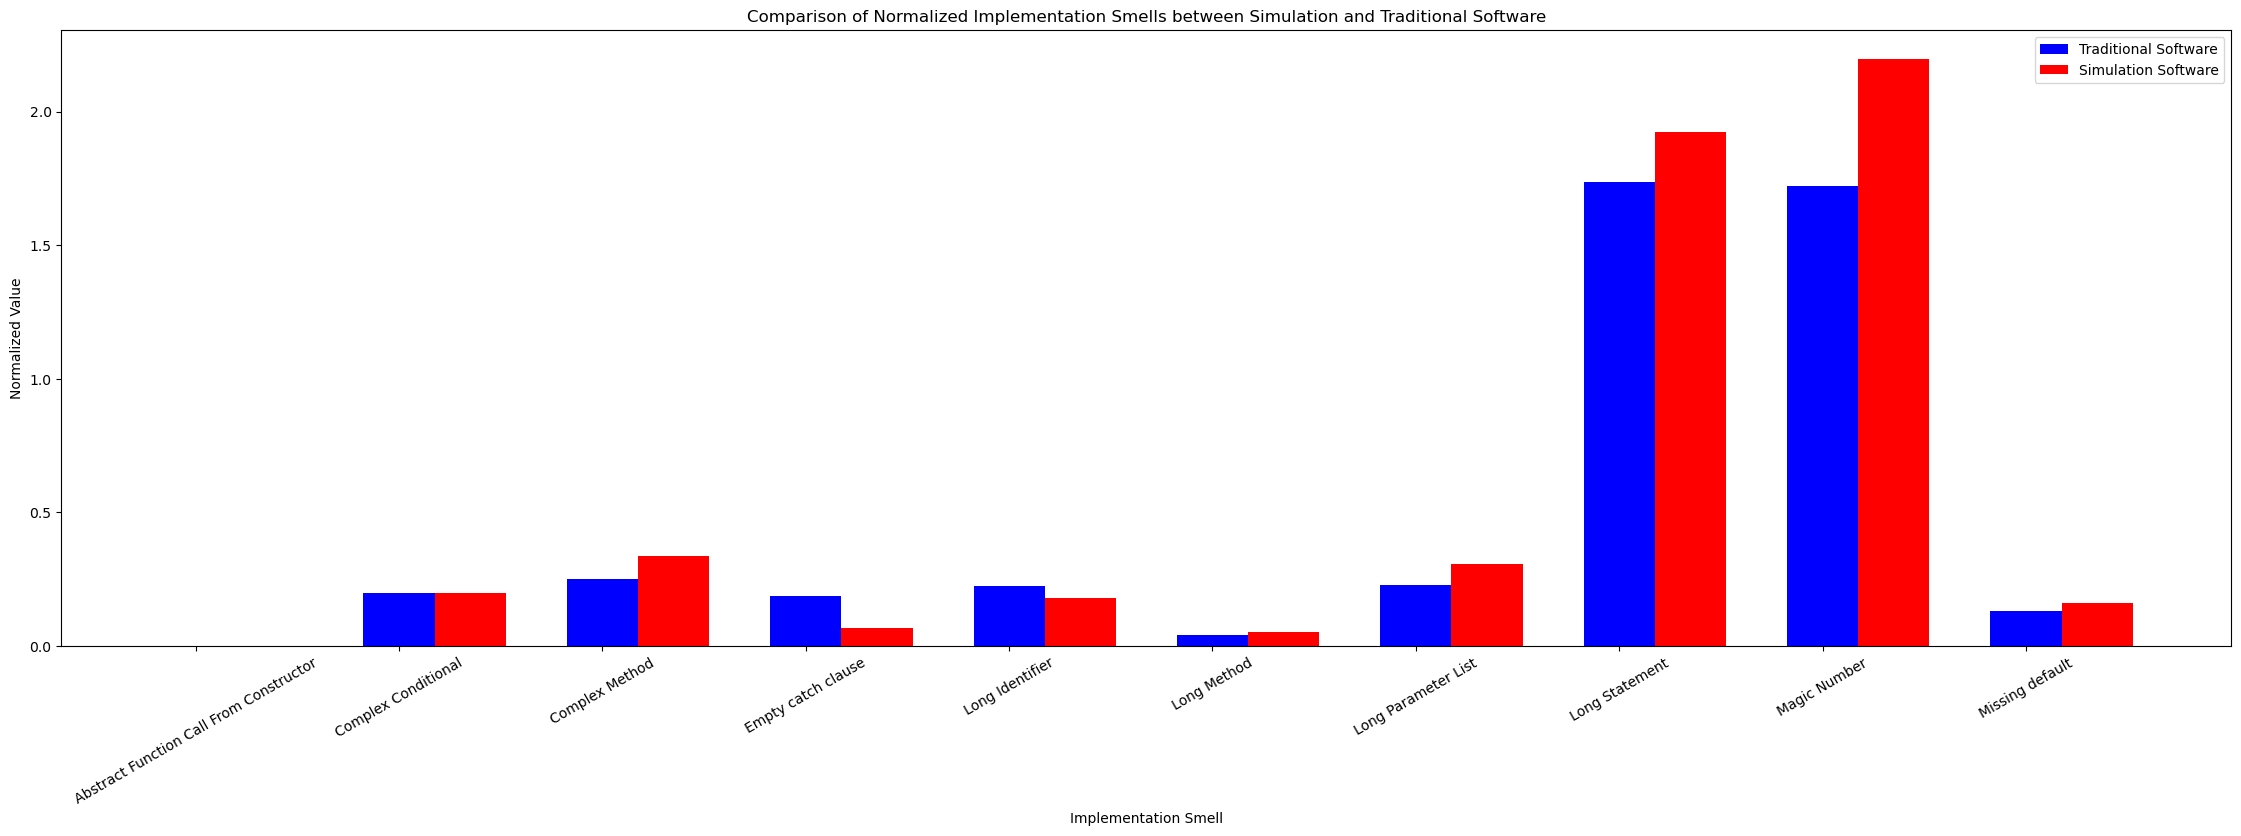

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

fig, ax = plt.subplots(figsize=(28, 8))

traditional_data = migtdf_g1.groupby('Implementation Smell')['Avg'].sum()
simulation_data = migsdf_g1.groupby('Implementation Smell')['Avg'].sum()

traditional_data_norm = traditional_data 
simulation_data_norm = simulation_data

bar_width = 0.35
bar1 = ax.bar(range(len(traditional_data_norm)), traditional_data_norm, bar_width, label='Traditional Software', color='blue')
bar2 = ax.bar([x + bar_width for x in range(len(simulation_data_norm))], simulation_data_norm, bar_width, label='Simulation Software', color='red')

ax.set_xlabel('Implementation Smell')
ax.set_ylabel('Normalized Value')
ax.set_title('Comparison of Normalized Implementation Smells between Simulation and Traditional Software')
ax.set_xticks(range(len(traditional_data_norm)))
ax.set_xticklabels(traditional_data_norm.index, rotation=30)
ax.legend()

## Get Individual Implementation Smell Statistics

0.313148678678975
(0.07831131163390267, 'negligible')
Not Statistically Significant


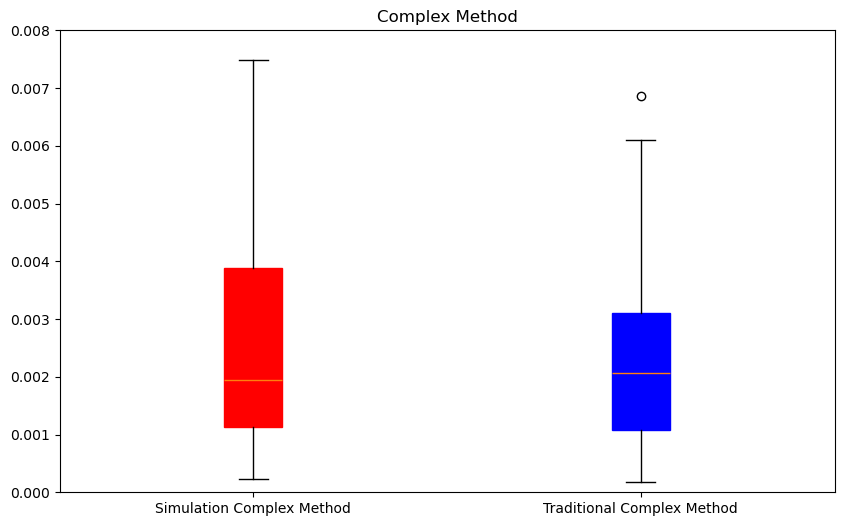

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd
from cliffs_delta import cliffs_delta

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)
smell = "Complex Method"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0, 0.008)
# plt.savefig(smell+'.png')
plt.show()

0.023163906222118565
(0.17487665439736863, 'small')
Statistically Significant


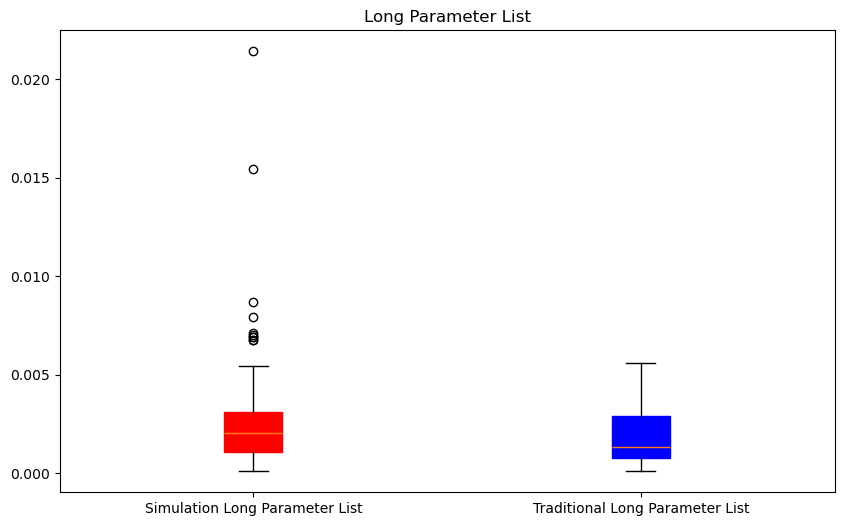

In [109]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])



smell = "Long Parameter List"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]


migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)
statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2], showfliers=False)
plt.title(smell)
# plt.ylim(0, 0.010)
# plt.savefig('magic_number.png')
plt.show()

0.03703888997364297
(0.1518908089156023, 'small')
Statistically Significant


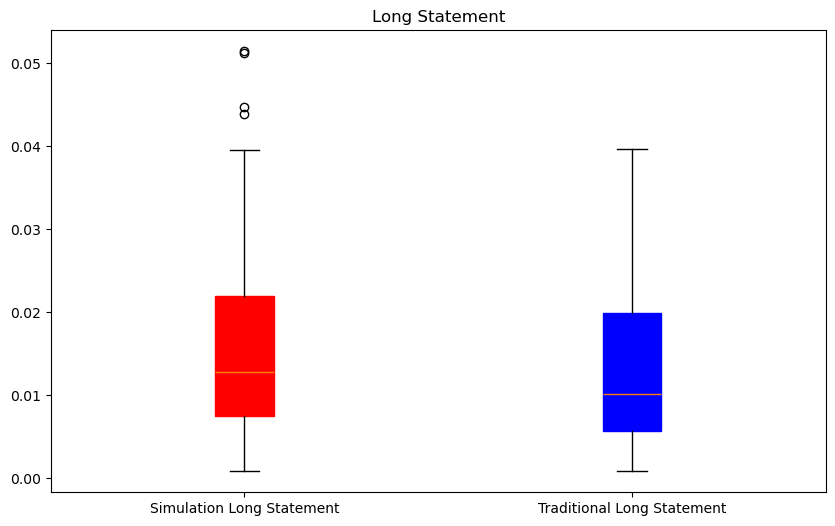

In [110]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Long Statement"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]



statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0, 0.06)
# plt.savefig('magic_number.png')
plt.show()

1.1986638673896801e-08
(0.5001268391679351, 'large')
Statistically Significant


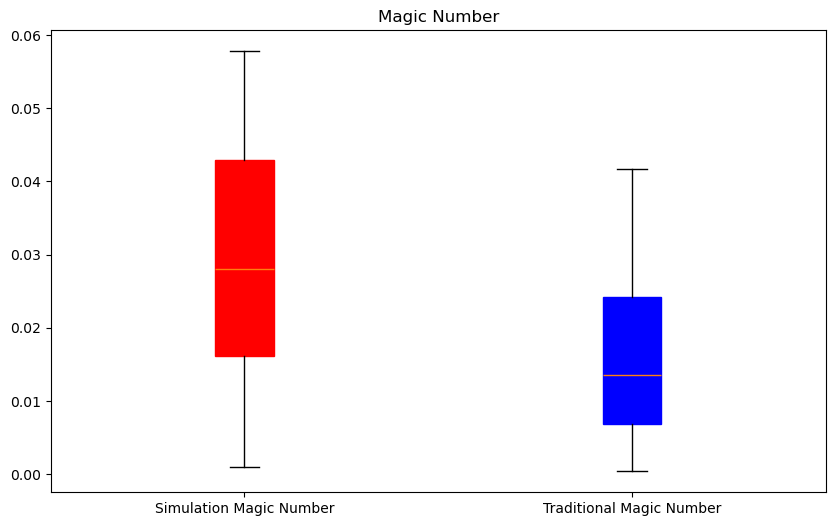

In [111]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)


smell = "Magic Number"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0, 0.3)
# plt.savefig('magic_number.png')
plt.show()

0.18496787237856904
(-0.10546457814168743, 'negligible')
Not Statistically Significant


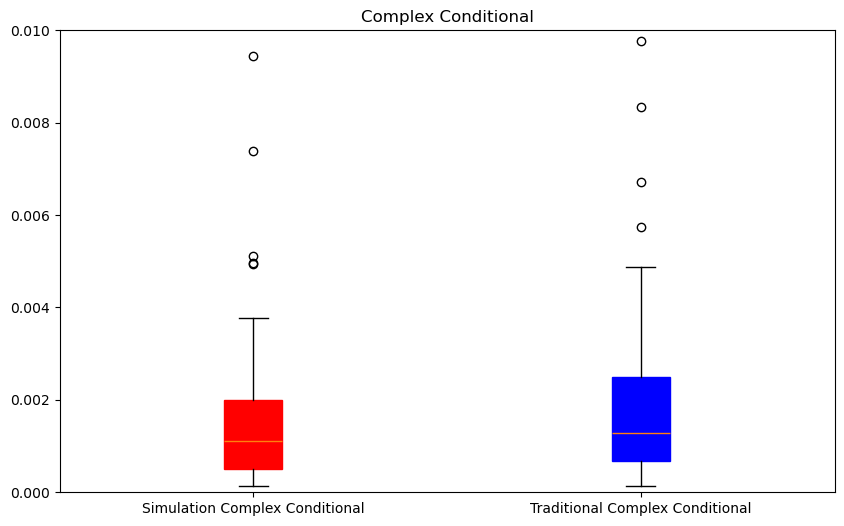

In [112]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Complex Conditional"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0, 0.01)
# plt.savefig('magic_number.png')
plt.show()

8.253649450684617e-05
(-0.4004733727810651, 'medium')
Statistically Significant


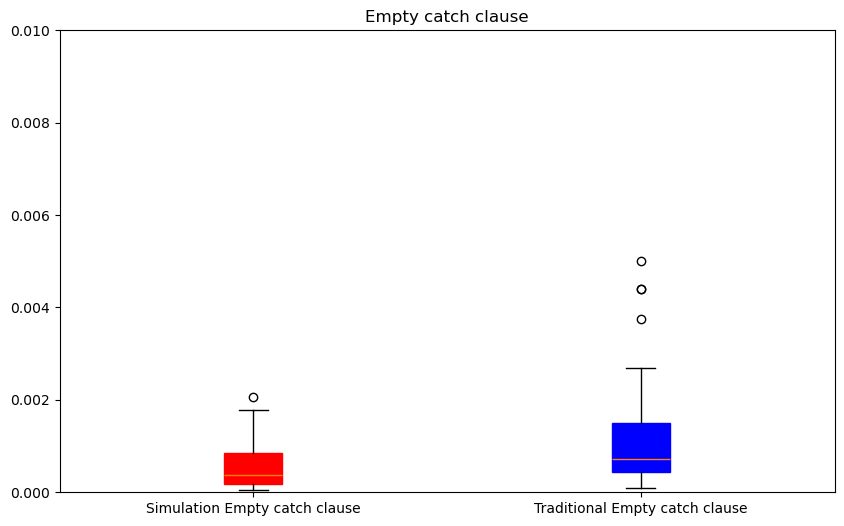

In [113]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Empty catch clause"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0, 0.01)
# plt.savefig('magic_number.png')
plt.show()

0.42242682014054567
(0.080078125, 'negligible')
Not Statistically Significant


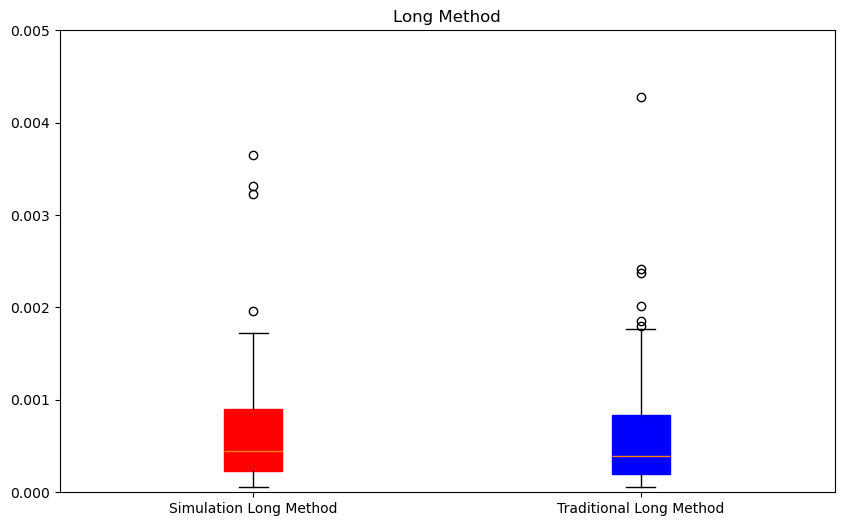

In [114]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Long Method"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0, 0.005)
# plt.savefig('magic_number.png')
plt.show()

0.944882496399364
(-0.006261058935619981, 'negligible')
Not Statistically Significant


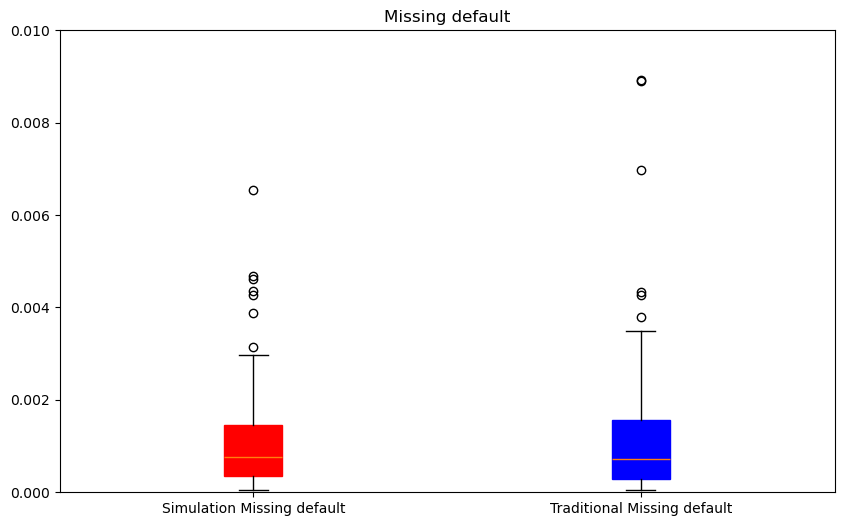

In [115]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Missing default"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0, 0.010)
# plt.savefig('magic_number.png')
plt.show()

0.2807013825358602
(-0.10592532467532467, 'negligible')
Not Statistically Significant


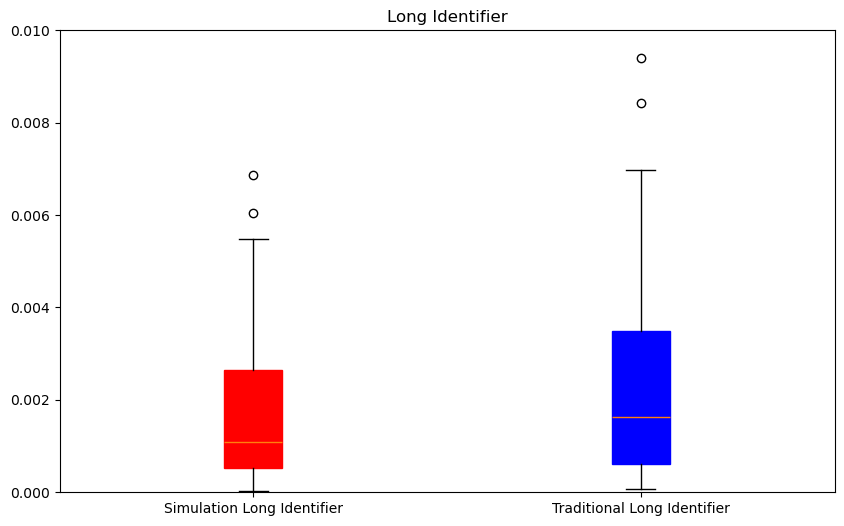

In [116]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Long Identifier"
migsdf_g1 = migsdf_g1[migsdf_g1['Implementation Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Implementation Smell'] == smell]



statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10,6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation '+smell], patch_artist=True, boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional '+smell], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0, 0.010)
# plt.savefig('magic_number.png')
plt.show()

## Get Differences Between Design Smells

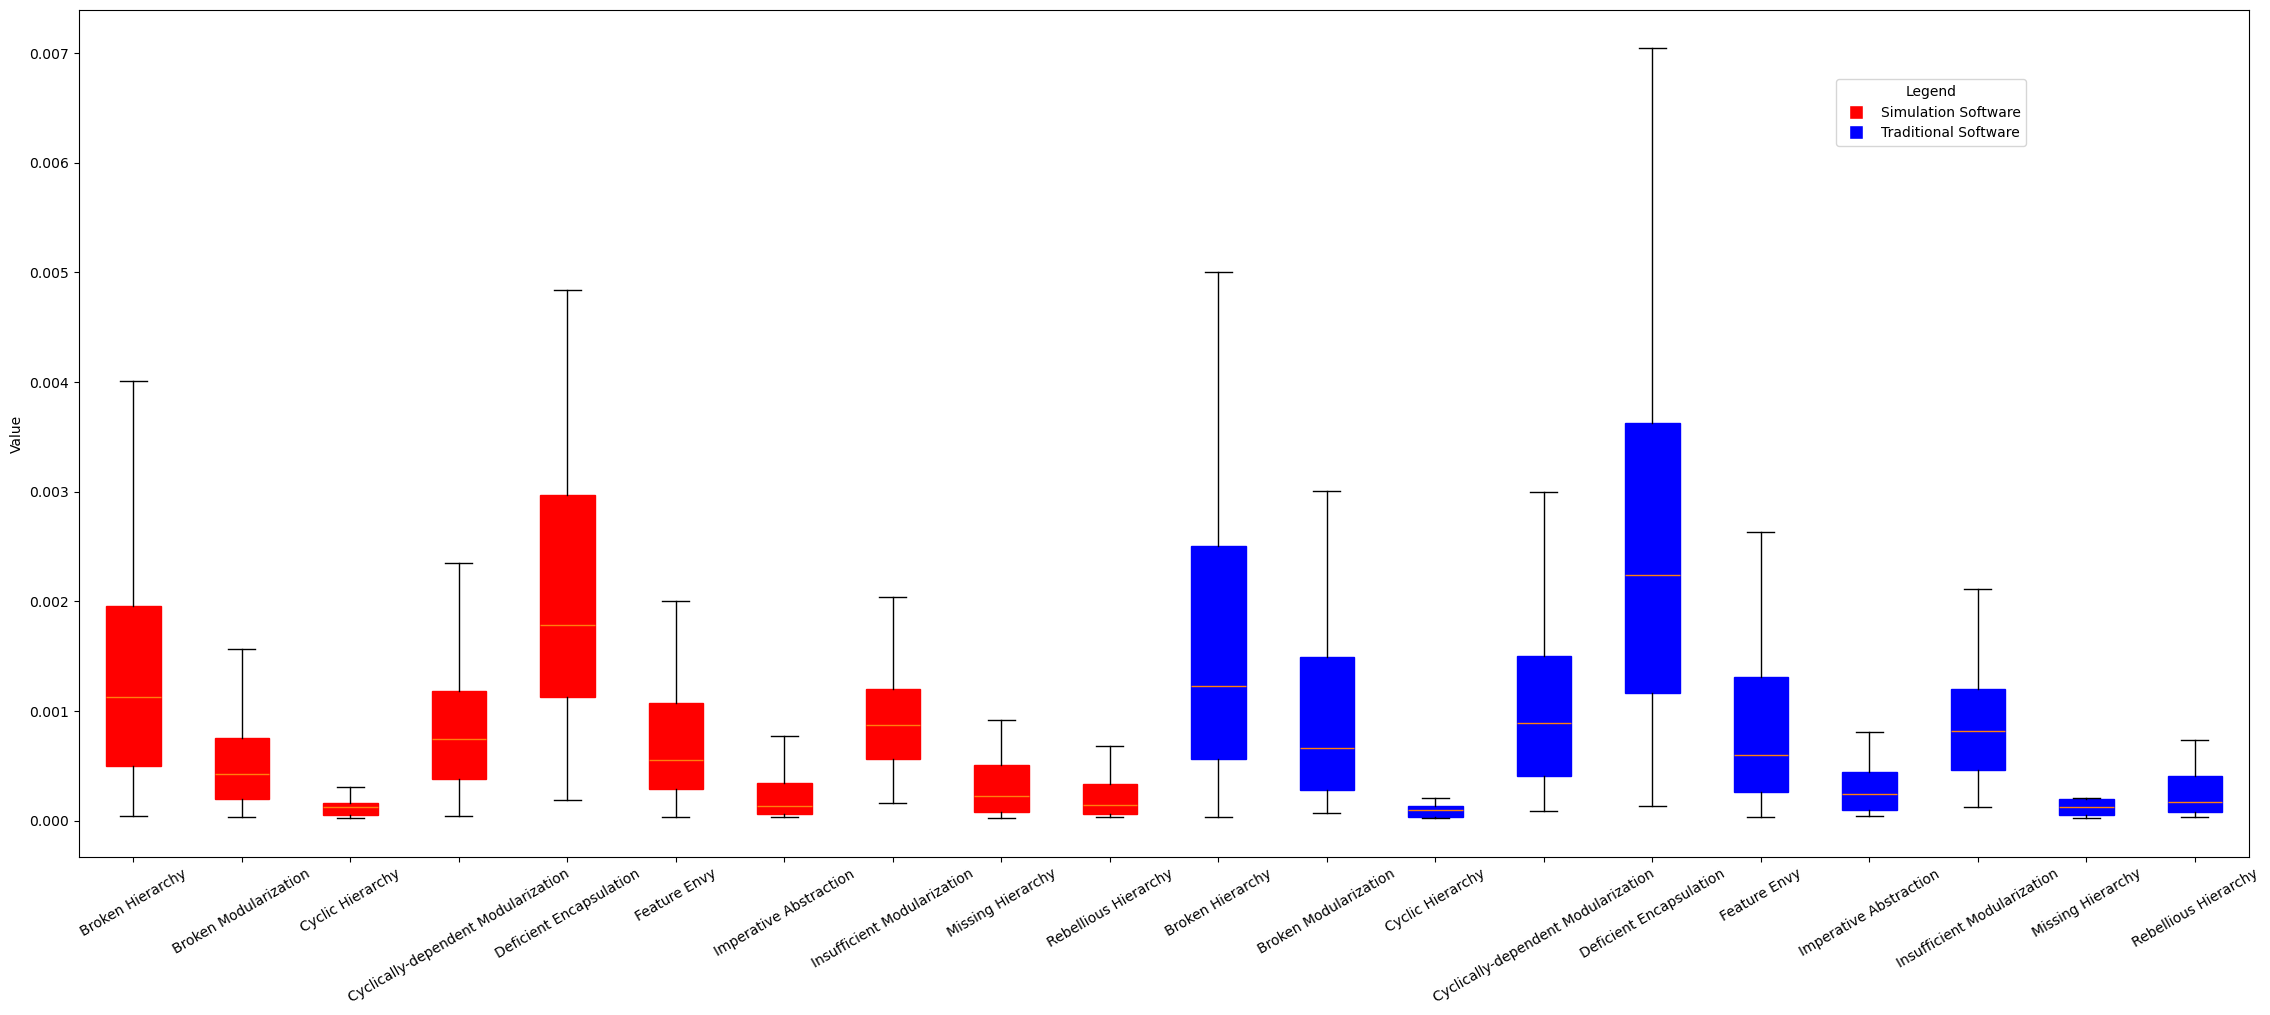

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

fig, ax = plt.subplots(figsize=(28, 11))
box1 = ax.boxplot([migsdf_g1[migsdf_g1['Design Smell']=='Broken Hierarchy']['Avg'], migsdf_g1[migsdf_g1['Design Smell']=='Broken Modularization']['Avg'], migsdf_g1[migsdf_g1['Design Smell']=='Cyclic Hierarchy']['Avg'], migsdf_g1[migsdf_g1['Design Smell']=='Cyclically-dependent Modularization']['Avg'], migsdf_g1[migsdf_g1['Design Smell']=='Deficient Encapsulation']['Avg'], migsdf_g1[migsdf_g1['Design Smell']=='Feature Envy']['Avg'], migsdf_g1[migsdf_g1['Design Smell']=='Imperative Abstraction']['Avg'], migsdf_g1[migsdf_g1['Design Smell']=='Insufficient Modularization']['Avg'], migsdf_g1[migsdf_g1['Design Smell']=='Missing Hierarchy']['Avg'],migsdf_g1[migsdf_g1['Design Smell']=='Rebellious Hierarchy']['Avg']],
                  labels=["Broken Hierarchy", "Broken Modularization", "Cyclic Hierarchy", "Cyclically-dependent Modularization", "Deficient Encapsulation", "Feature Envy", "Imperative Abstraction", "Insufficient Modularization", "Missing Hierarchy", "Rebellious Hierarchy" ], positions=[1, 2, 3,4,5,6,7,8,9,10],
                  patch_artist=True, boxprops=dict(facecolor="red", color="red"), showfliers=False)

box2 = ax.boxplot([migtdf_g1[migtdf_g1['Design Smell']=='Broken Hierarchy']['Avg'], migtdf_g1[migtdf_g1['Design Smell']=='Broken Modularization']['Avg'], migtdf_g1[migtdf_g1['Design Smell']=='Cyclic Hierarchy']['Avg'], migtdf_g1[migtdf_g1['Design Smell']=='Cyclically-dependent Modularization']['Avg'], migtdf_g1[migtdf_g1['Design Smell']=='Deficient Encapsulation']['Avg'], migtdf_g1[migtdf_g1['Design Smell']=='Feature Envy']['Avg'], migtdf_g1[migtdf_g1['Design Smell']=='Imperative Abstraction']['Avg'], migtdf_g1[migtdf_g1['Design Smell']=='Insufficient Modularization']['Avg'], migtdf_g1[migtdf_g1['Design Smell']=='Missing Hierarchy']['Avg'],migtdf_g1[migtdf_g1['Design Smell']=='Rebellious Hierarchy']['Avg']],
                  labels=["Broken Hierarchy", "Broken Modularization", "Cyclic Hierarchy", "Cyclically-dependent Modularization", "Deficient Encapsulation", "Feature Envy", "Imperative Abstraction", "Insufficient Modularization", "Missing Hierarchy", "Rebellious Hierarchy" ], positions=[11, 12, 13,14,15,16,17,18, 19,20],
                  patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), showfliers=False)

# plt.ylim(0, 0.015)

# Create a custom legend
legend_labels = ['Simulation Software', 'Traditional Software']
legend_colors = ['red', 'blue']
custom_legend = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
                 for label, color in zip(legend_labels, legend_colors)]

# Add the legend to the figure
fig.legend(handles=custom_legend, loc='lower left', bbox_to_anchor=(0.75, 0.75), title="Legend")

plt.ylabel('Value')
plt.xticks(rotation=30)
plt.title('')
plt.savefig("Design comparison2.png")

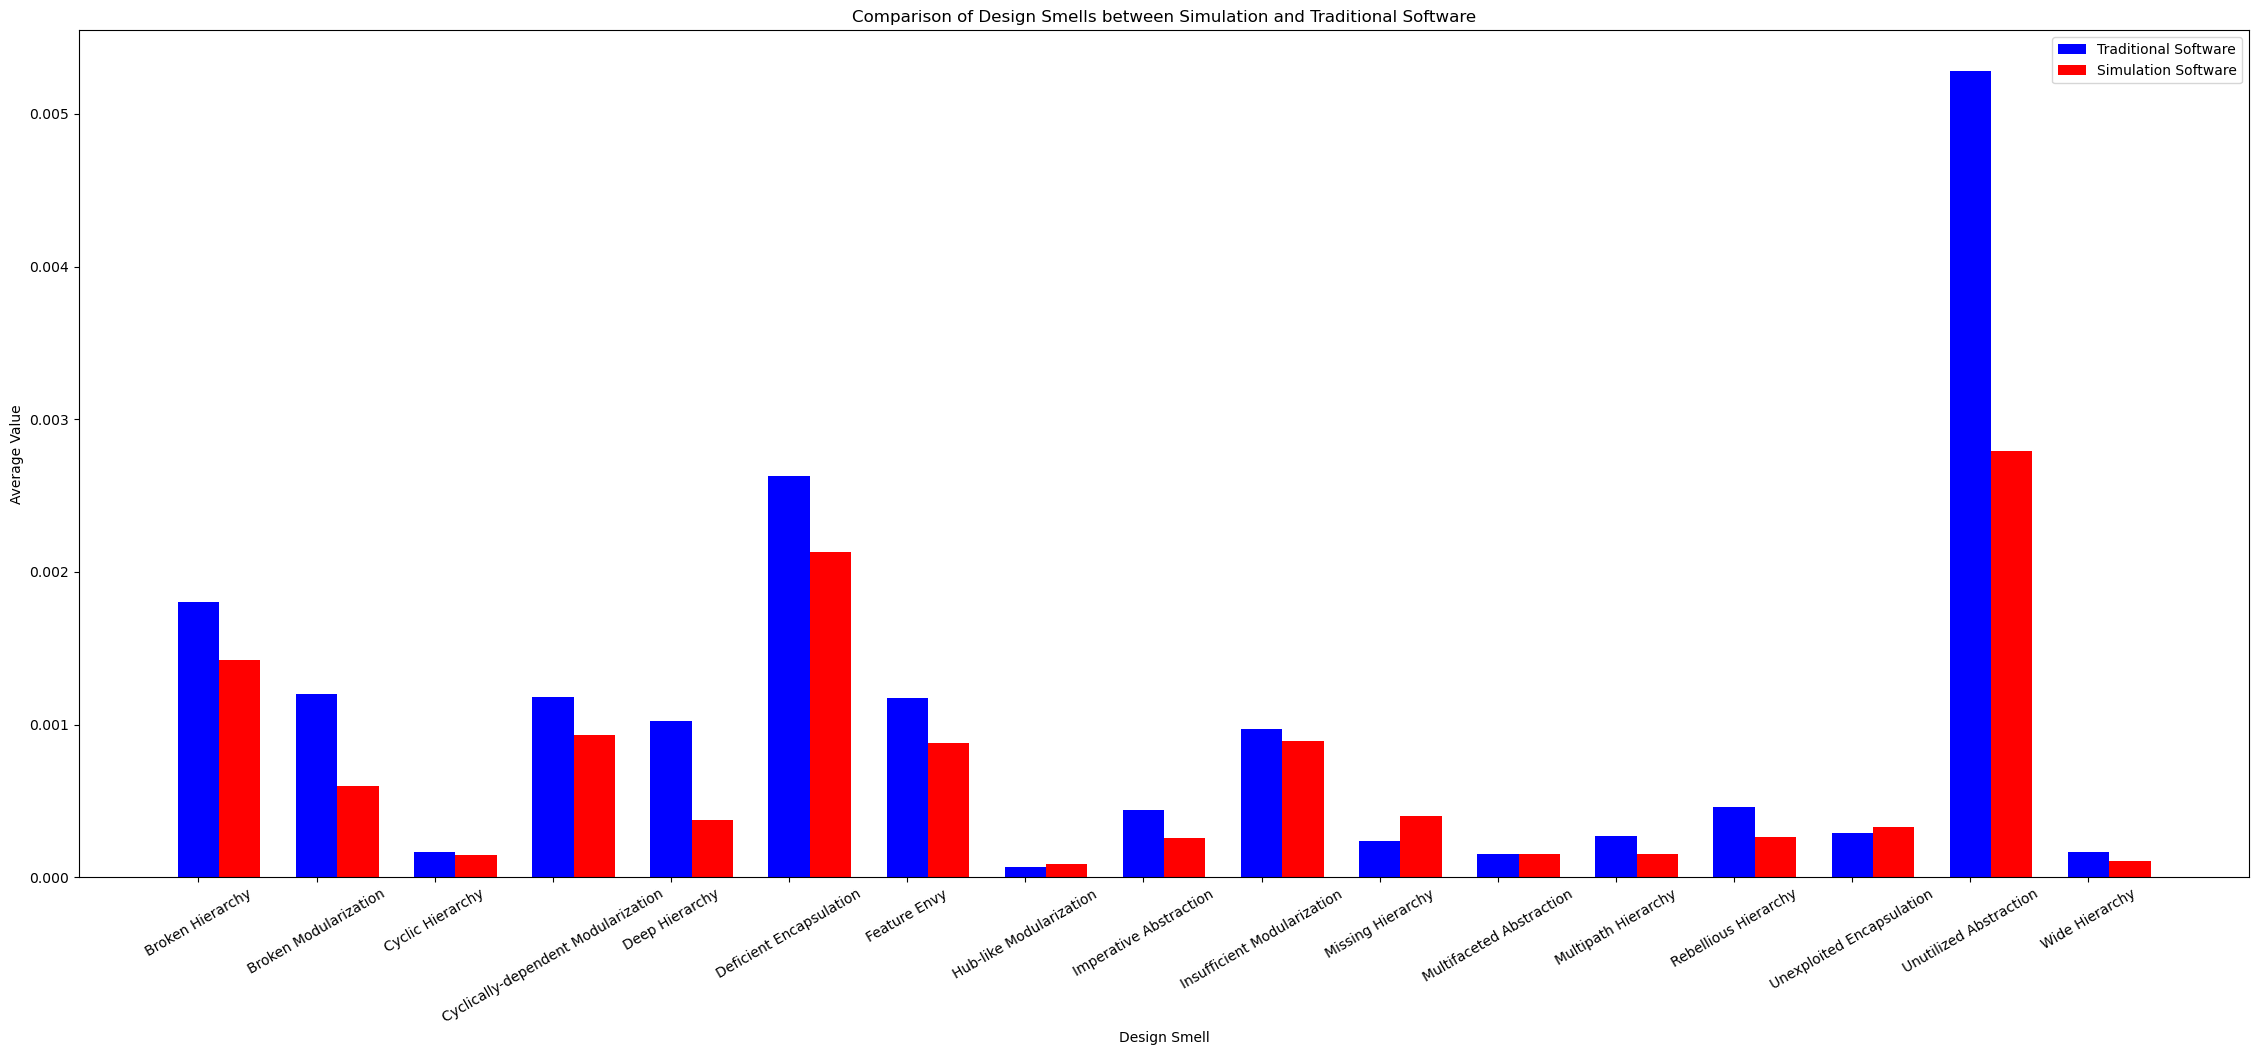

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'].str.len() <= 100]

fig, ax = plt.subplots(figsize=(28, 11))

traditional_data = migtdf_g1.groupby('Design Smell')['Avg'].mean()
simulation_data = migsdf_g1.groupby('Design Smell')['Avg'].mean()

bar_width = 0.35
bar1 = ax.bar(range(len(traditional_data)), traditional_data, bar_width, label='Traditional Software', color='blue')
bar2 = ax.bar([x + bar_width for x in range(len(simulation_data))], simulation_data, bar_width, label='Simulation Software', color='red')

ax.set_xlabel('Design Smell')
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Design Smells between Simulation and Traditional Software')
ax.set_xticks(range(len(traditional_data)))
ax.set_xticklabels(traditional_data.index, rotation=30)
ax.legend()

## Get Individual Design Smell Statistics

0.4683969583002303
(-0.0672077922077922, 'negligible')
Not Statistically Significant


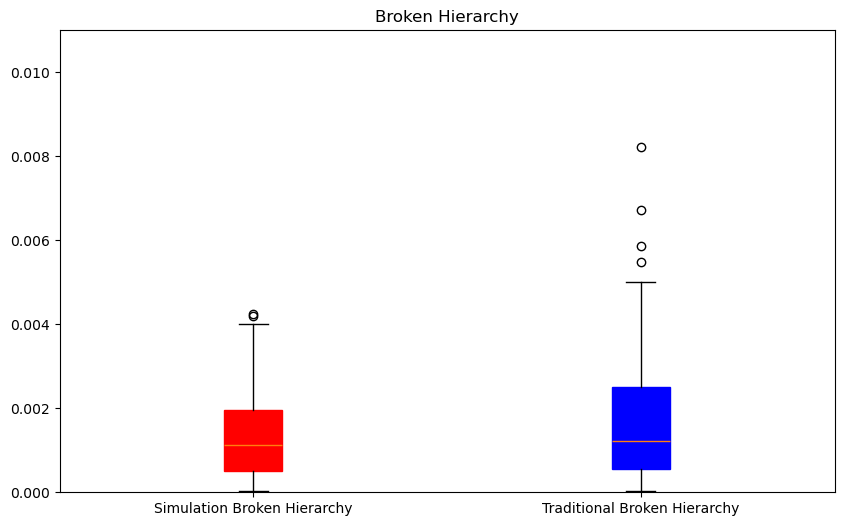

In [117]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Broken Hierarchy"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0,0.011)
# plt.savefig(smell + '.png')
plt.show()

0.4683969583002303
(-1.0, 'large')
Not Statistically Significant


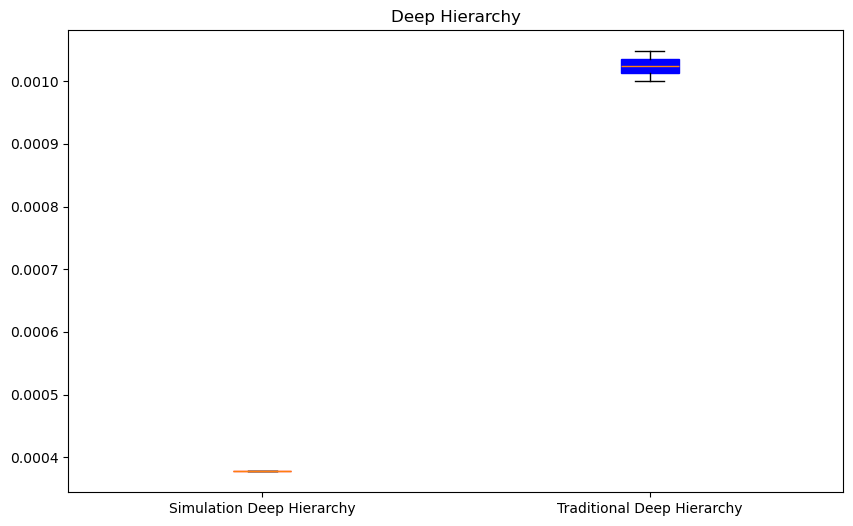

In [118]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Deep Hierarchy"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]


print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.011)
# plt.savefig(smell + '.png')
plt.show()

0.05964549321285119
(-0.322463768115942, 'small')
Not Statistically Significant


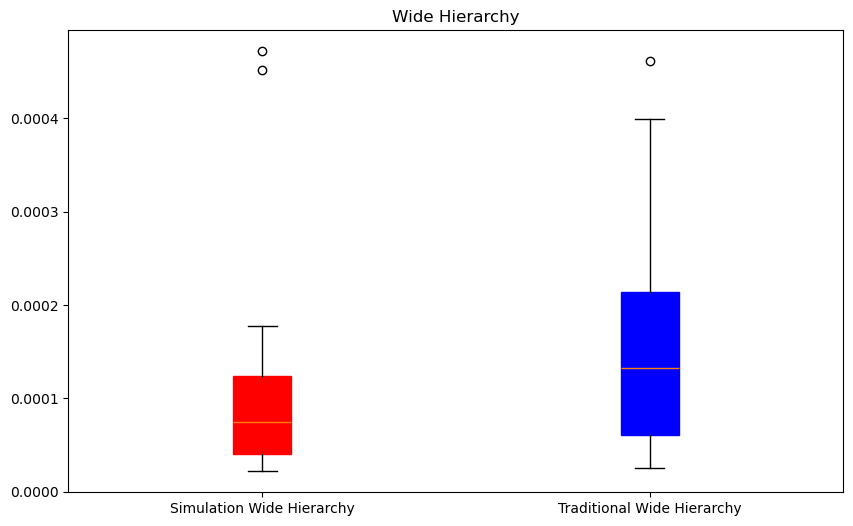

In [119]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Wide Hierarchy"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.011)
# plt.savefig(smell + '.png')
plt.show()

3.2479463591210735e-09
(-0.638477801268499, 'large')
Statistically Significant


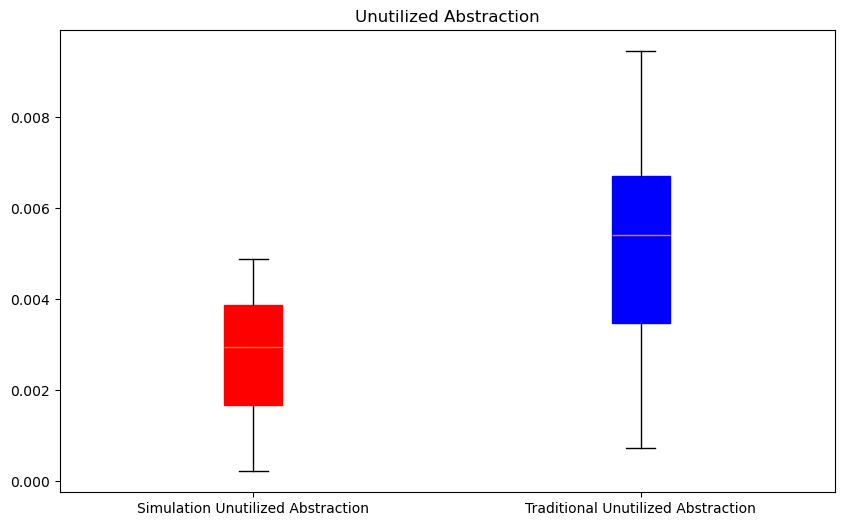

In [120]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Unutilized Abstraction"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.011)
# plt.savefig(smell + '.png')
plt.show()

0.39509158490415
(0.19166666666666668, 'small')
Not Statistically Significant


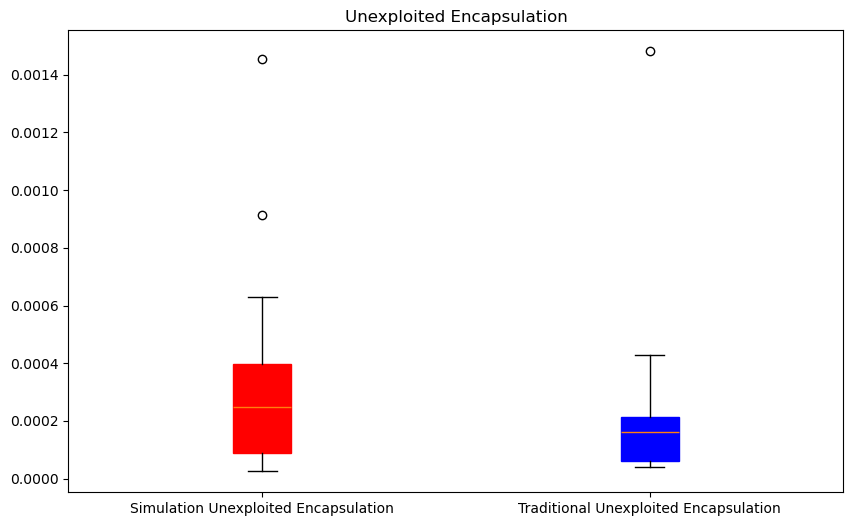

In [121]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Unexploited Encapsulation"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.011)
# plt.savefig(smell + '.png')
plt.show()

0.003966946524796598
(-0.27835648148148145, 'small')
Statistically Significant


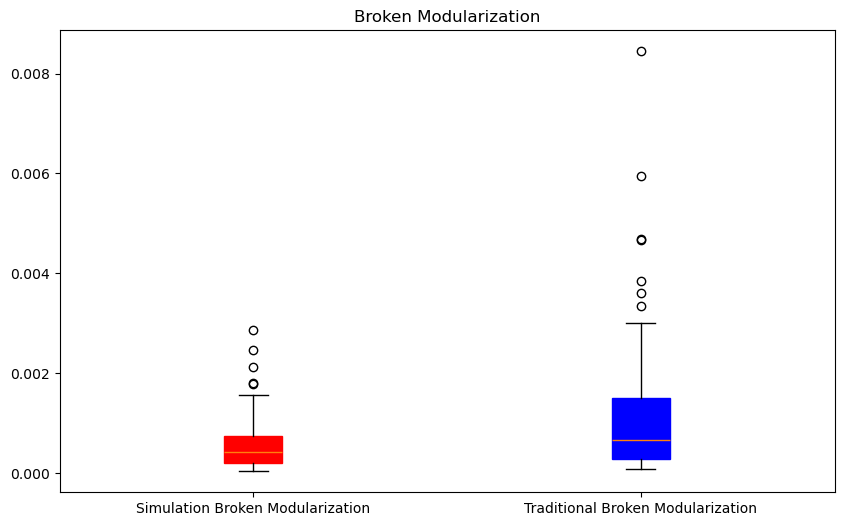

In [122]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")


migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Broken Modularization"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.008)
# plt.savefig(smell + '.png')
plt.show()

0.7246176591547373
(0.0700280112044818, 'negligible')
Not Statistically Significant


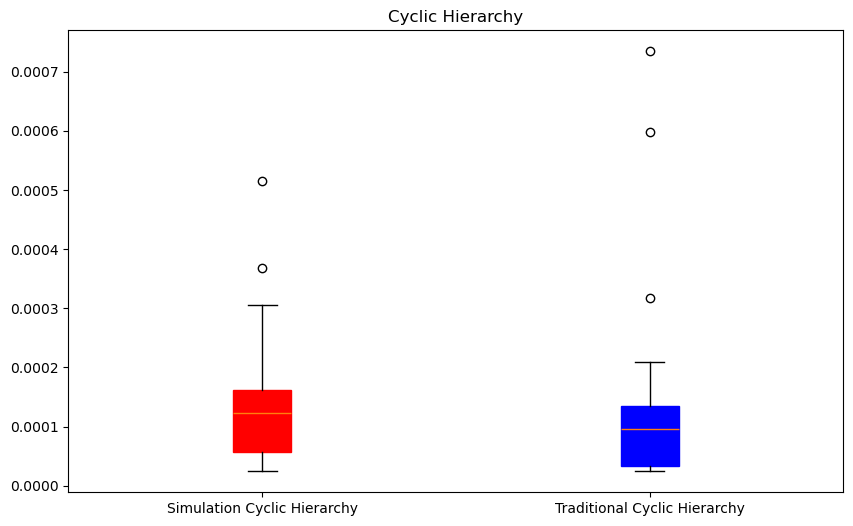

In [123]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Cyclic Hierarchy"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)


cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.010)
# plt.savefig(smell + '.png')
plt.show()

0.17968979554665576
(-0.11798941798941799, 'negligible')
Not Statistically Significant


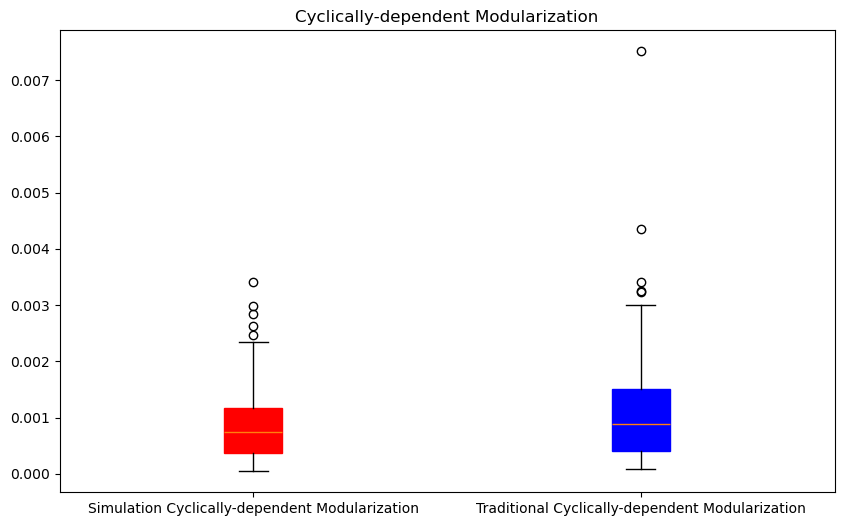

In [124]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Cyclically-dependent Modularization"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]



statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.007)
# plt.savefig(smell + '.png')
plt.show()

0.2018530159887555
(-0.10137895812053116, 'negligible')
Not Statistically Significant


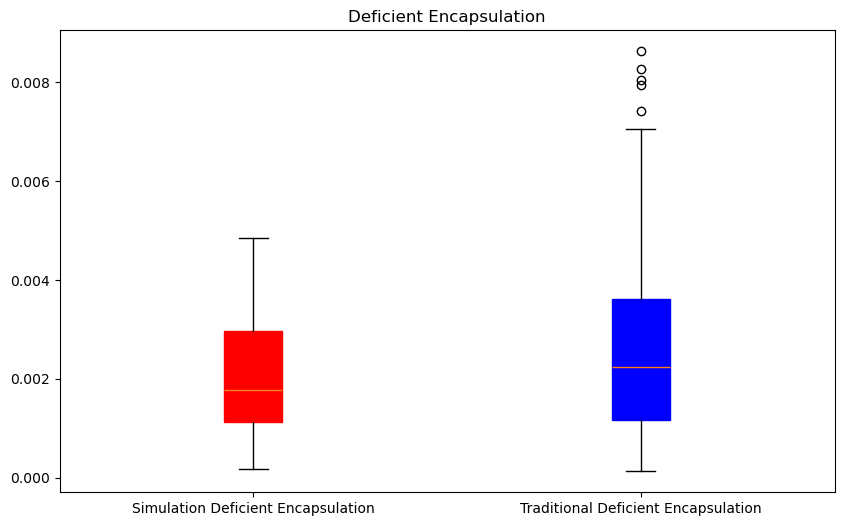

In [125]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Deficient Encapsulation"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)
cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.019)
# plt.savefig(smell + '.png')
plt.show()

0.9378594919557829
(-0.008097165991902834, 'negligible')
Not Statistically Significant


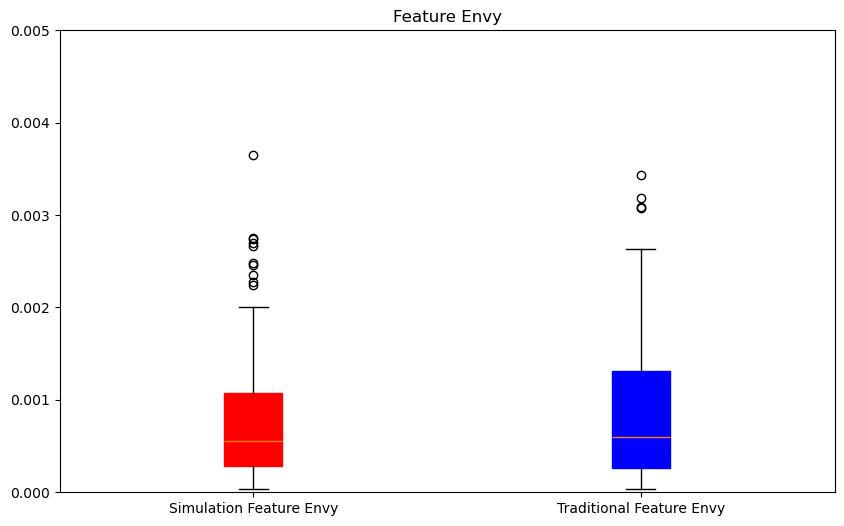

In [126]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

smell = "Feature Envy"

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0,0.005)
# plt.savefig(smell + '.png')
plt.show()

0.11018959564343679
(-0.25333333333333335, 'small')
Not Statistically Significant


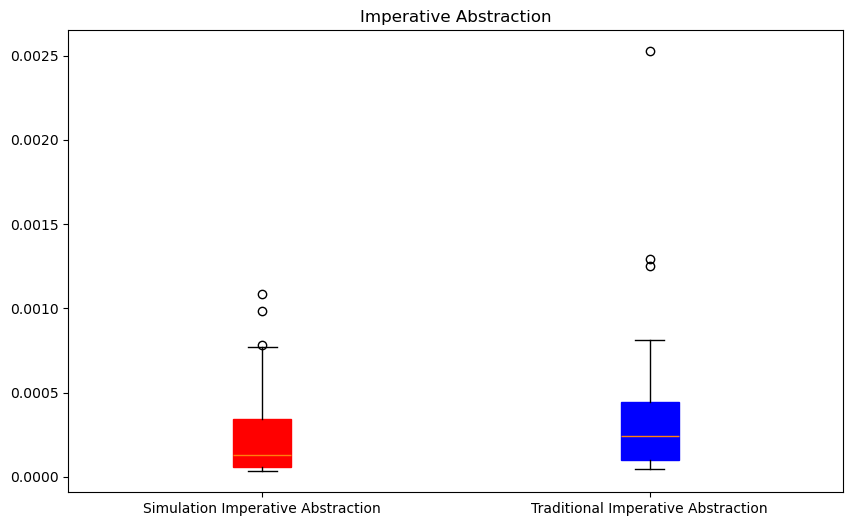

In [127]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Imperative Abstraction"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.010)
# plt.savefig(smell + '.png')
plt.show()

0.692173082220719
(0.03363844393592677, 'negligible')
Not Statistically Significant


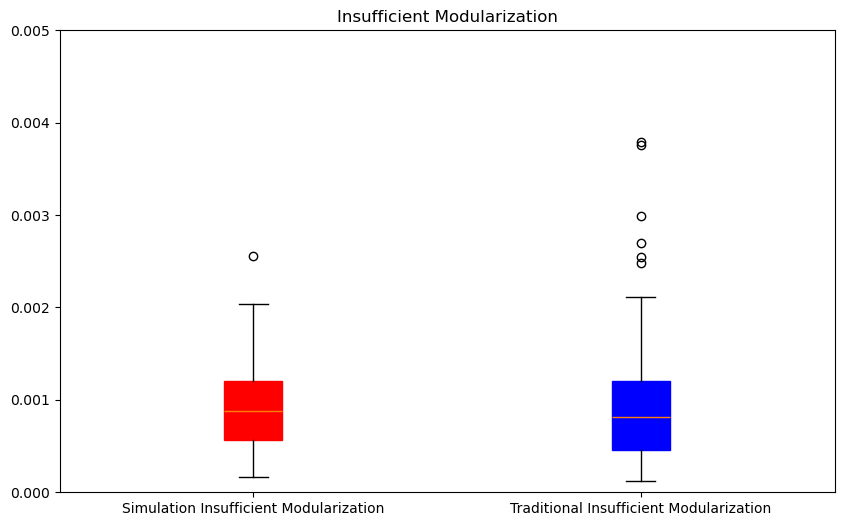

In [128]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Insufficient Modularization"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]



statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0,0.005)
# plt.savefig(smell + '.png')
plt.show()

0.692173082220719
(0.2714285714285714, 'small')
Not Statistically Significant


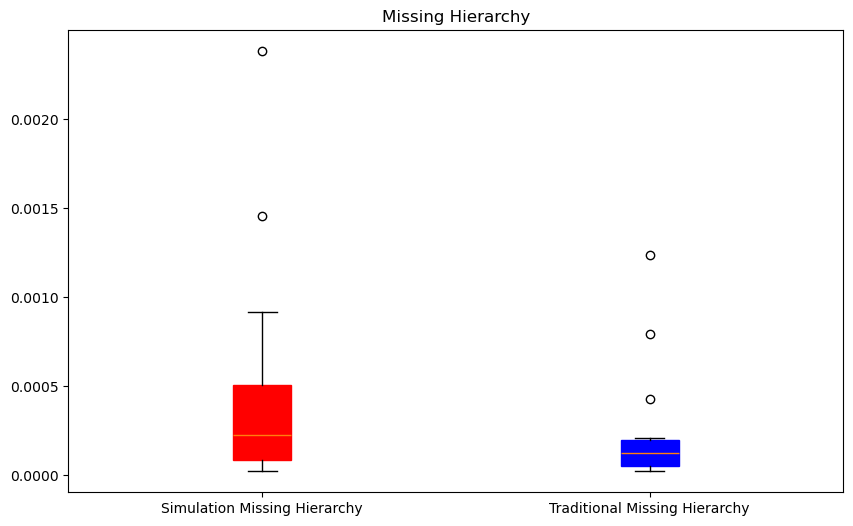

In [129]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Missing Hierarchy"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.010)
# plt.savefig(smell + '.png')
plt.show()

0.43361395605194364
(-0.12220916568742655, 'negligible')
Not Statistically Significant


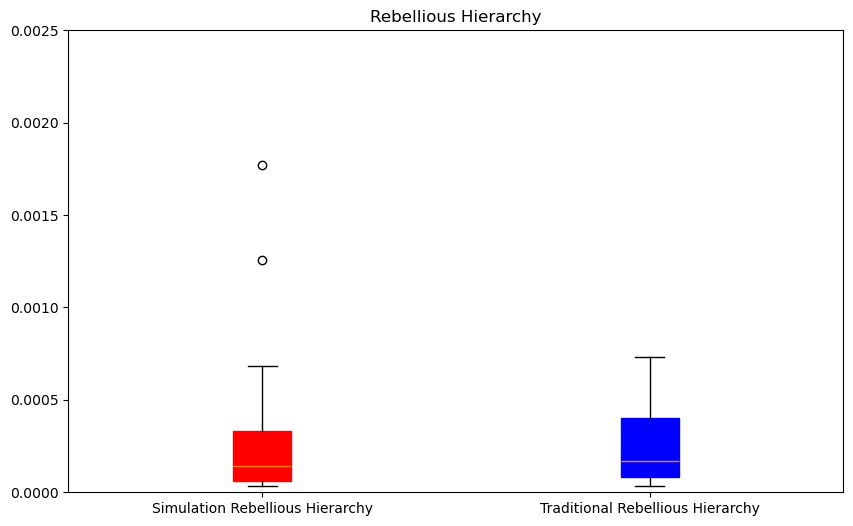

In [130]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

migtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Design Smell Simulation.csv")
migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

smell = "Rebellious Hierarchy"
migsdf_g1 = migsdf_g1[migsdf_g1['Design Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Design Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0,0.0025)
# plt.savefig(smell + '.png')
plt.show()

In [24]:
## Get Differences Between Architecture Smells

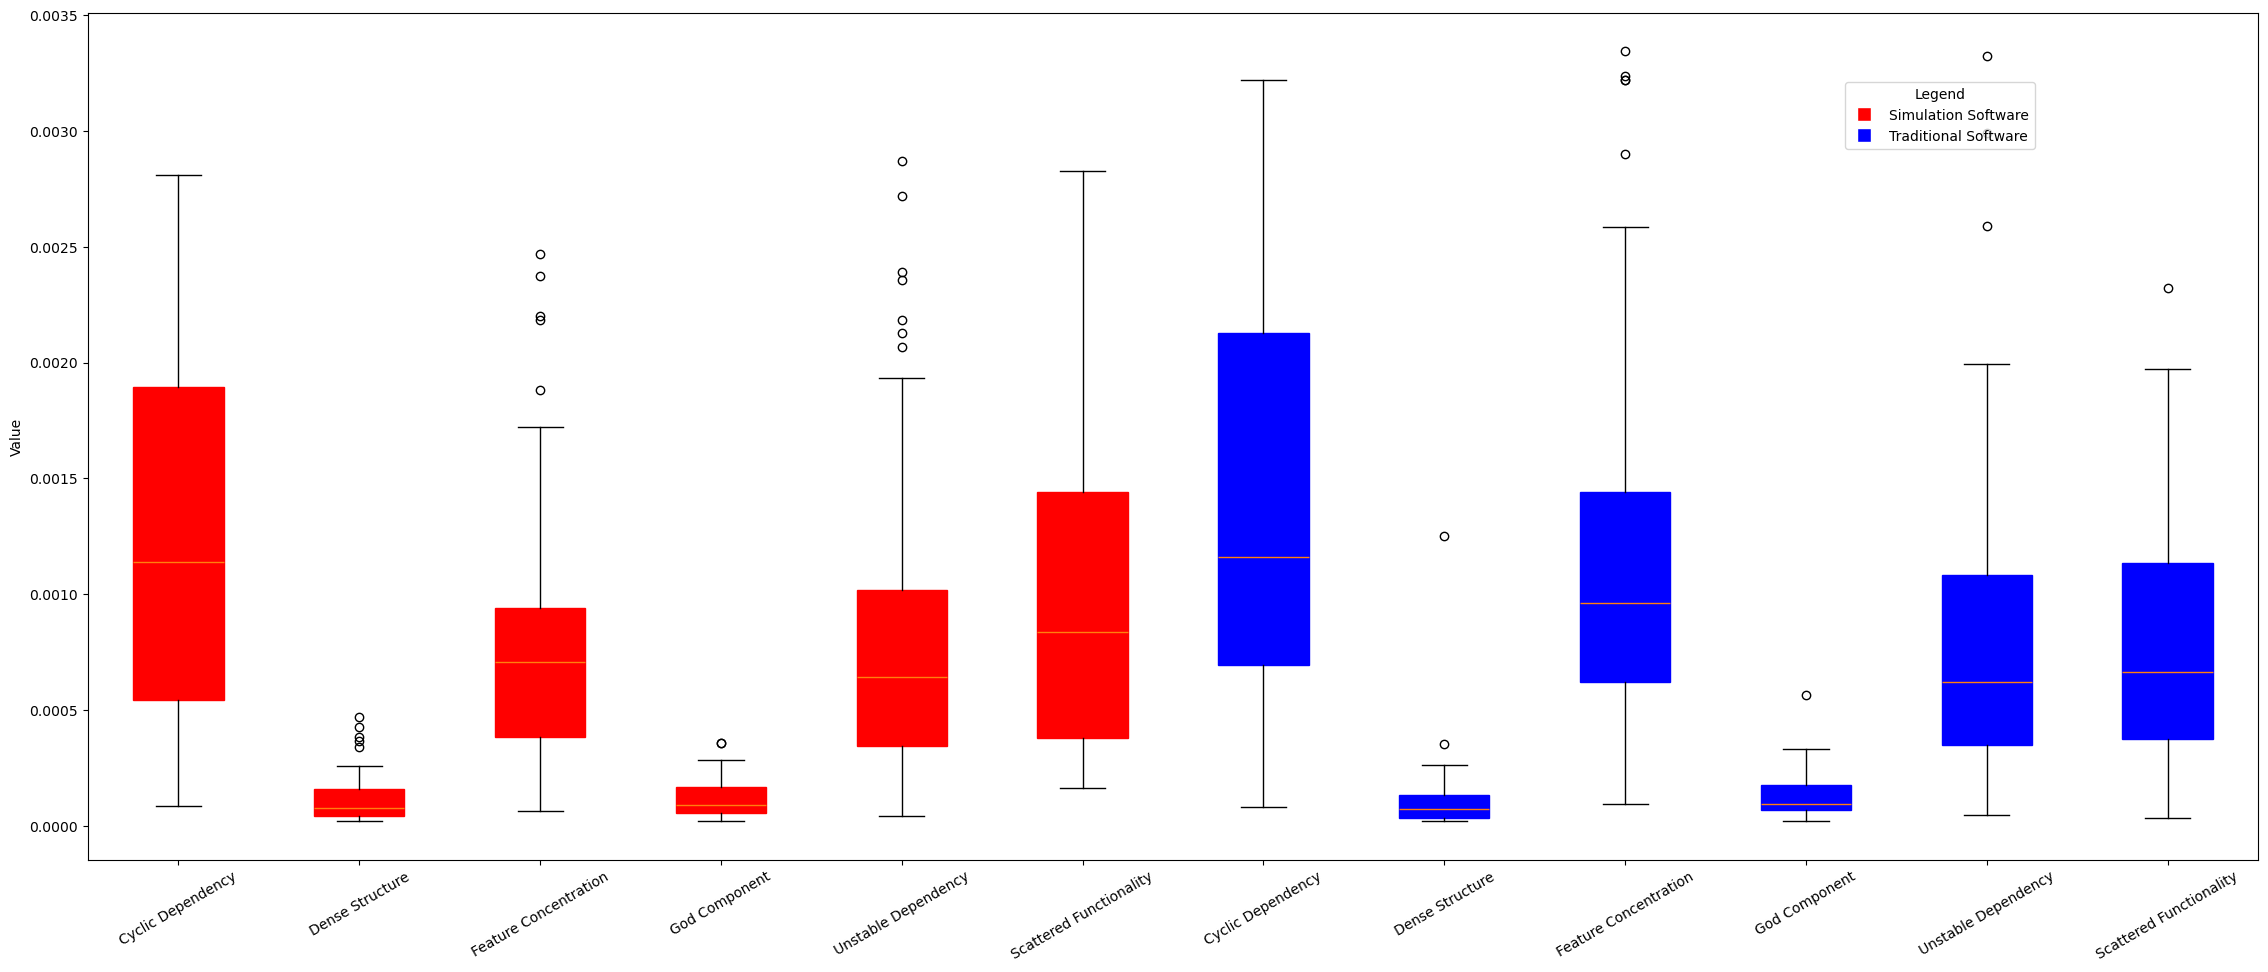

In [131]:
migtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

fig, ax = plt.subplots(figsize=(28, 11))
box1 = ax.boxplot([migsdf_g1[migsdf_g1['Architecture Smell']=='Cyclic Dependency']['Avg'], migsdf_g1[migsdf_g1['Architecture Smell']=='Dense Structure']['Avg'], migsdf_g1[migsdf_g1['Architecture Smell']=='Feature Concentration']['Avg'], migsdf_g1[migsdf_g1['Architecture Smell']=='God Component']['Avg'], migsdf_g1[migsdf_g1['Architecture Smell']=='Unstable Dependency']['Avg'], migsdf_g1[migsdf_g1['Architecture Smell']=='Scattered Functionality']['Avg']],
                  labels=["Cyclic Dependency", "Dense Structure", "Feature Concentration", "God Component", "Unstable Dependency", "Scattered Functionality"], positions=[1, 2, 3,4,5,6],
                  patch_artist=True, boxprops=dict(facecolor="red", color="red"))

box2 = ax.boxplot([migtdf_g1[migtdf_g1['Architecture Smell']=='Cyclic Dependency']['Avg'], migtdf_g1[migtdf_g1['Architecture Smell']=='Dense Structure']['Avg'], migtdf_g1[migtdf_g1['Architecture Smell']=='Feature Concentration']['Avg'], migtdf_g1[migtdf_g1['Architecture Smell']=='God Component']['Avg'], migtdf_g1[migtdf_g1['Architecture Smell']=='Unstable Dependency']['Avg'], migtdf_g1[migtdf_g1['Architecture Smell']=='Scattered Functionality']['Avg']],
                  labels=["Cyclic Dependency", "Dense Structure", "Feature Concentration", "God Component", "Unstable Dependency", "Scattered Functionality"], positions=[7,8,9,10,11,12],
                  patch_artist=True, boxprops=dict(facecolor="blue", color="blue"))

# plt.ylim(0, 0.015)

# Create a custom legend
legend_labels = ['Simulation Software', 'Traditional Software']
legend_colors = ['red', 'blue']
custom_legend = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
                 for label, color in zip(legend_labels, legend_colors)]

# Add the legend to the figure
fig.legend(handles=custom_legend, loc='lower left', bbox_to_anchor=(0.75, 0.75), title="Legend")

plt.ylabel('Value')
plt.xticks(rotation=30)
plt.title('')
plt.savefig("Architecture comparison2.png")

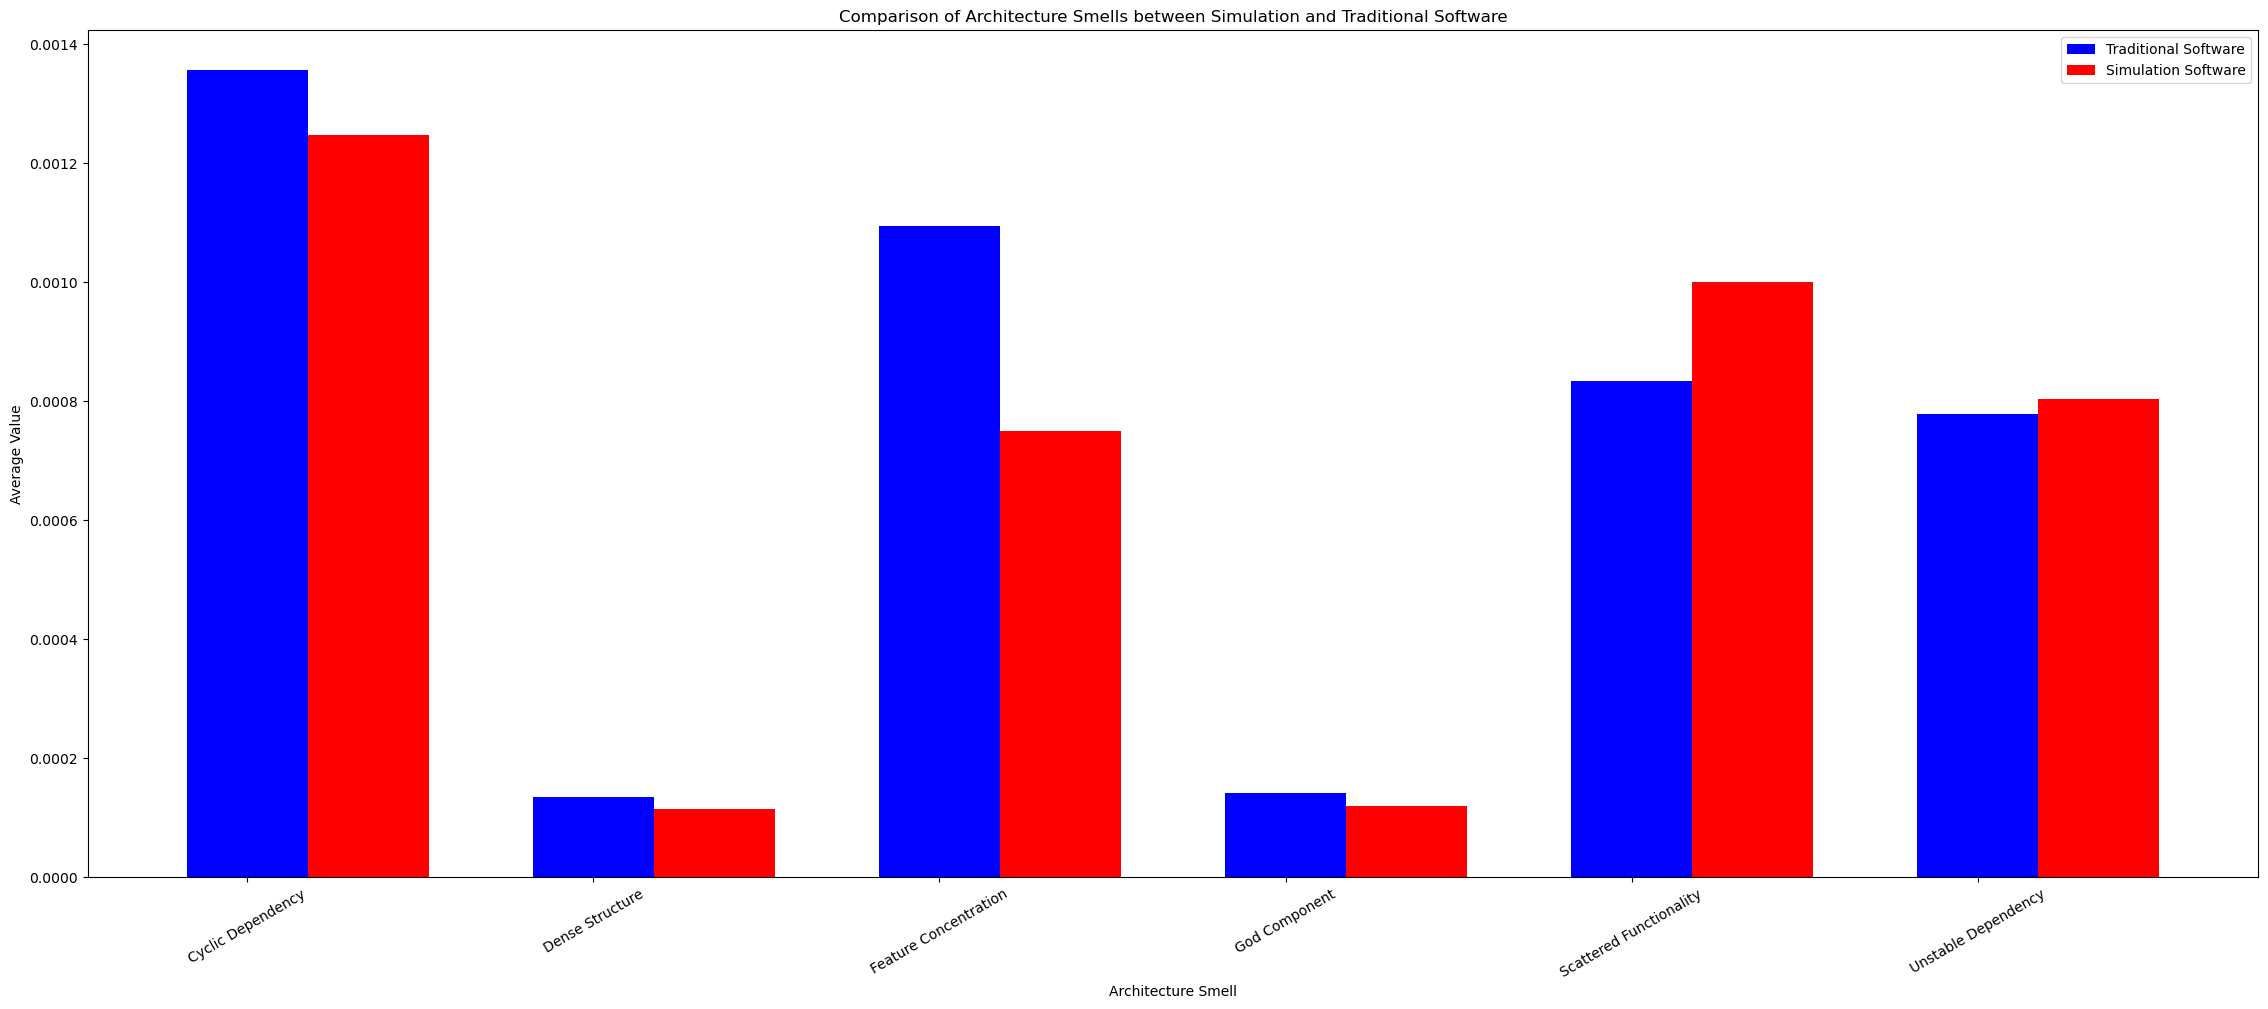

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

migtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

fig, ax = plt.subplots(figsize=(28, 11))

traditional_data = migtdf_g1.groupby('Architecture Smell')['Avg'].mean()
simulation_data = migsdf_g1.groupby('Architecture Smell')['Avg'].mean()

bar_width = 0.35
bar1 = ax.bar(range(len(traditional_data)), traditional_data, bar_width, label='Traditional Software', color='blue')
bar2 = ax.bar([x + bar_width for x in range(len(simulation_data))], simulation_data, bar_width, label='Simulation Software', color='red')

ax.set_xlabel('Architecture Smell')
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Architecture Smells between Simulation and Traditional Software')
ax.set_xticks(range(len(traditional_data)))
ax.set_xticklabels(traditional_data.index, rotation=30)
ax.legend()

## Get Individual Architecture Smell statistics

0.464248555916855
(-0.07354866870362287, 'negligible')
Not Statistically Significant


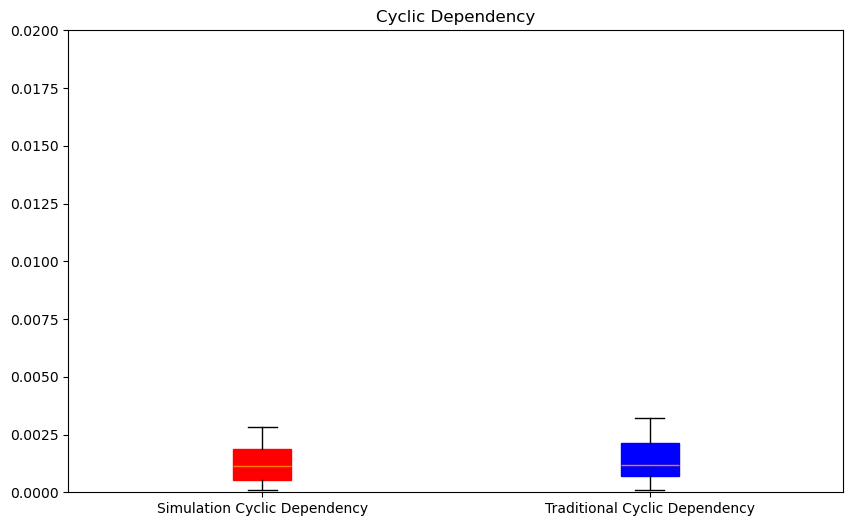

In [133]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

smell = "Cyclic Dependency"

migtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migsdf_g1 = migsdf_g1[migsdf_g1['Architecture Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Architecture Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0,0.020)
plt.savefig(smell + '.png')
plt.show()

0.719182286990525
(0.045454545454545456, 'negligible')
Not Statistically Significantt


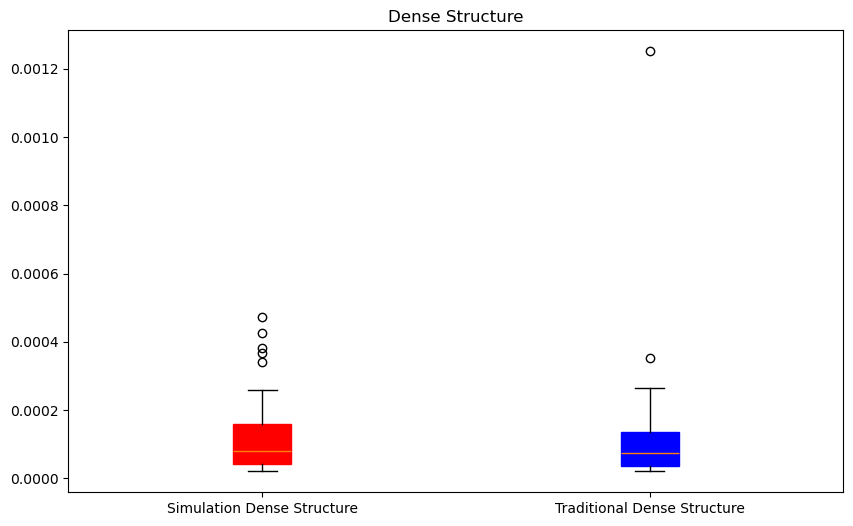

In [134]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

smell = "Dense Structure"

migtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migsdf_g1 = migsdf_g1[migsdf_g1['Architecture Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Architecture Smell'] == smell]


statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)


if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significantt")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.010)
plt.savefig(smell + '.png')
plt.show()

10591.5
6.597532465966451e-06
(-0.3284209206070488, 'small')
Statistically Significant


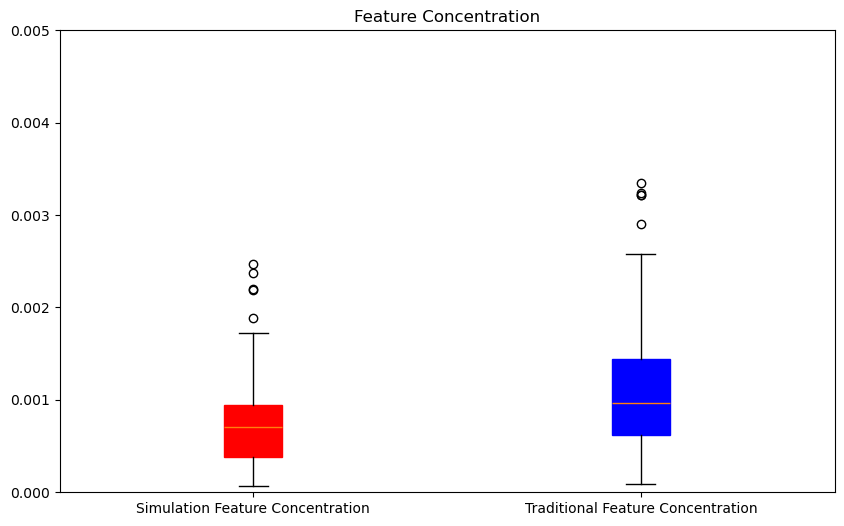

In [141]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

smell = "Feature Concentration"

migtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migsdf_g1 = migsdf_g1[migsdf_g1['Architecture Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Architecture Smell'] == smell]

statistic, p_value = mannwhitneyu( migtdf_g1['Avg'], migsdf_g1['Avg'])
print(statistic)
print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0,0.005)
plt.savefig(smell + '.png')
plt.show()

0.31429325308476697
(-0.127114020731042, 'negligible')
Not Statistically Significant


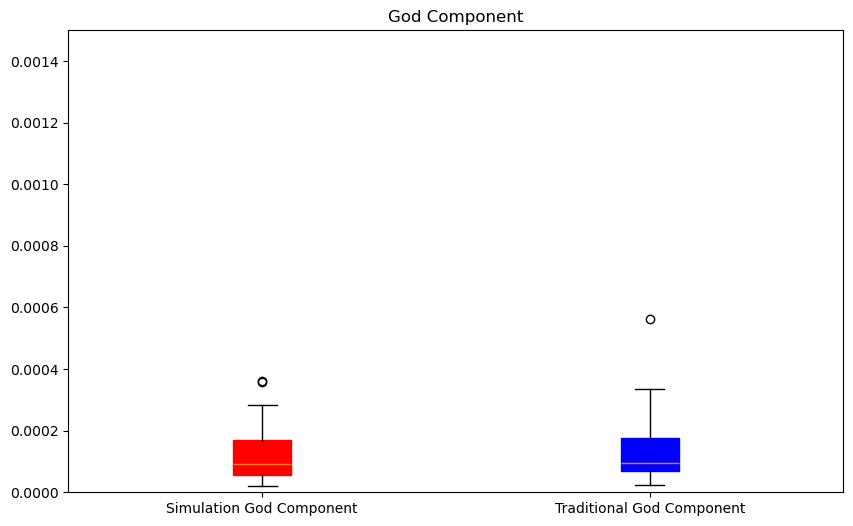

In [136]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

smell = "God Component"

migtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migsdf_g1 = migsdf_g1[migsdf_g1['Architecture Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Architecture Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0,0.0015)
plt.savefig(smell + '.png')
plt.show()

0.7720782011607322
(0.023514851485148515, 'negligible')
Not Statistically Significant


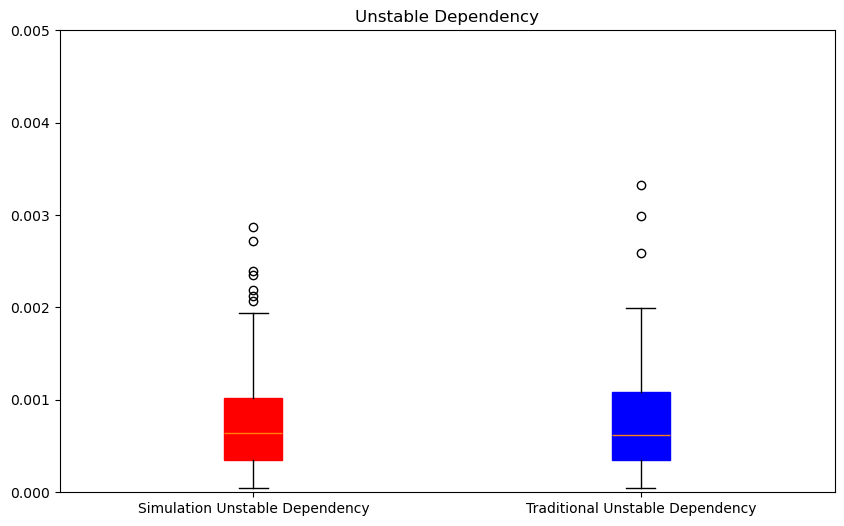

In [137]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

smell = "Unstable Dependency"

migtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migsdf_g1 = migsdf_g1[migsdf_g1['Architecture Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Architecture Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
plt.ylim(0,0.005)
plt.savefig(smell + '.png')
plt.show()

0.49847957363542195
(0.10476190476190476, 'negligible')
Not Statistically Significant


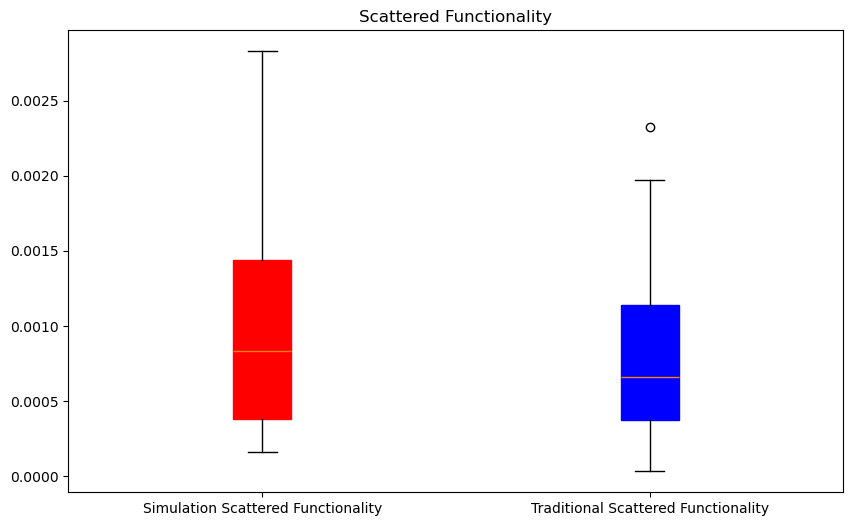

In [138]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

smell = "Scattered Functionality"

migtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

migsdf_g1 = migsdf_g1[migsdf_g1['Architecture Smell'] == smell]
migtdf_g1 = migtdf_g1[migtdf_g1['Architecture Smell'] == smell]

statistic, p_value = mannwhitneyu(migsdf_g1['Avg'], migtdf_g1['Avg'])

print(p_value)

cf_delta = cliffs_delta(migsdf_g1['Avg'], migtdf_g1['Avg'])
print(cf_delta)

if p_value < 0.05:
    print("Statistically Significant")
else:
    print("Not Statistically Significant")

plt.figure(figsize=(10, 6))
plt.boxplot([migsdf_g1['Avg']], labels=['Simulation ' + smell], patch_artist=True,
            boxprops=dict(facecolor="red", color="red"), positions=[1])
plt.boxplot([migtdf_g1['Avg']], labels=['Traditional ' + smell], patch_artist=True,
            boxprops=dict(facecolor="blue", color="blue"), positions=[2])
plt.title(smell)
# plt.ylim(0,0.010)
plt.savefig(smell + '.png')
plt.show()

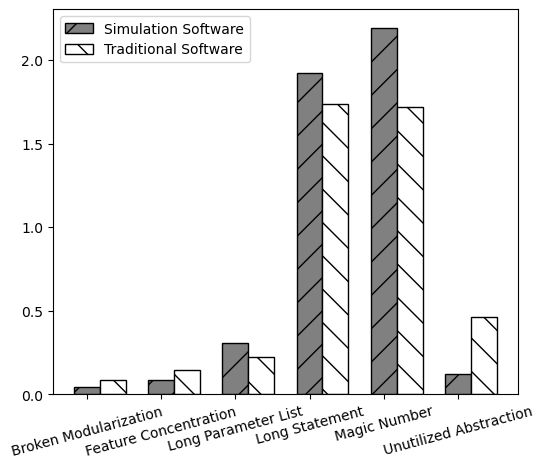

In [196]:
import matplotlib.pyplot as plt
import pandas as pd

migtdf_g1 = pd.read_csv("Implementation Smell Traditional.csv")
migsdf_g1 = pd.read_csv("Implementation Smell Simulation.csv")

migsdf_g1 = remove_outliers(migsdf_g1,1, ['Avg'])
migtdf_g1 = remove_outliers(migtdf_g1,1, ['Avg'])

migtdf_g1 = migtdf_g1.sample(n=len(migsdf_g1), random_state=0)

mdgtdf_g1 = pd.read_csv("Design Smell Traditional.csv")
mdgsdf_g1 = pd.read_csv("Design Smell Simulation.csv")

mdgsdf_g1 = remove_outliers(mdgsdf_g1,1, ['Avg'])
mdgtdf_g1 = remove_outliers(mdgtdf_g1,1, ['Avg'])

mdgtdf_g1 = mdgtdf_g1.sample(n=len(mdgsdf_g1), random_state=0)

magtdf_g1 = pd.read_csv("Architecture Smell Traditional.csv")
magsdf_g1 = pd.read_csv("Architecture Smell Simulation.csv")

magsdf_g1 = remove_outliers(magsdf_g1,1, ['Avg'])
magtdf_g1 = remove_outliers(magtdf_g1,1, ['Avg'])

magtdf_g1 = magtdf_g1.sample(n=len(magsdf_g1), random_state=0)

fig, ax = plt.subplots(figsize=(6, 5))

migsdf_g1.rename(columns={'Implementation Smell': "Smell"}, inplace=True)
mdgsdf_g1.rename(columns={'Design Smell': "Smell"}, inplace=True)
magsdf_g1.rename(columns={'Architecture Smell': "Smell"}, inplace=True)


migtdf_g1.rename(columns={'Implementation Smell': "Smell"}, inplace=True)
mdgtdf_g1.rename(columns={'Design Smell': "Smell"}, inplace=True)
magtdf_g1.rename(columns={'Architecture Smell': "Smell"}, inplace=True)

super_mgsdf = pd.concat([migsdf_g1, mdgsdf_g1, magsdf_g1], ignore_index=True)
super_mgtdf = pd.concat([migtdf_g1, mdgtdf_g1, magtdf_g1], ignore_index=True)

traditional_data = super_mgtdf.groupby('Smell')
traditional_data = traditional_data.filter(lambda x: x.name in ['Long Parameter List', 'Long Statement', 'Empty Catch Clause', 'Magic Number', 'Unutilized Abstraction', 'Broken Modularization', 'Feature Concentration'])
traditional_data = traditional_data.groupby('Smell')['Avg'].sum()


simulation_data = super_mgsdf.groupby('Smell')
simulation_data = simulation_data.filter(lambda x: x.name in ['Long Parameter List', 'Long Statement', 'Empty Catch Clause', 'Magic Number', 'Unutilized Abstraction', 'Broken Modularization', 'Feature Concentration'])
simulation_data = simulation_data.groupby('Smell')['Avg'].sum()

bar_width = 0.35
bar1 = ax.bar(range(len(simulation_data)), simulation_data, bar_width, label='Simulation Software', color='gray', edgecolor='black', hatch='/')
bar2 = ax.bar([x + bar_width for x in range(len(traditional_data))], traditional_data, bar_width, label='Traditional Software', color='white', edgecolor='black', hatch='\\')

# ax.set_xlabel('Implementation Smell')
# ax.set_ylabel('Normalized Value')
# ax.set_title('Comparison of Normalized Implementation Smells between Simulation and Traditional Software')
ax.set_xticks(range(len(traditional_data)))
ax.set_xticklabels(traditional_data.index, rotation=15)
ax.legend()

plt.savefig('significant_smells.png')

In [175]:

traditional_data = super_mgsdf.groupby('Smell')
traditional_data.filter(lambda x: x.name in ['Long Parameter List', 'Long Statement', 'Empty Catch Clause', 'Magic Number'. 'Unutilized Abstraction', 'Broken Modularization', 'Feature Concentration'])

TypeError: Index(...) must be called with a collection of some kind, <function <lambda> at 0x0000014622DD91C0> was passed

In [170]:
['Long Parameter List', 'Long Statement', 'Empty Catch Clause', 'Magic Number', 'Unutilized Abstraction', 'Broken Modularization', 'Feature Concentration']

['Long Parameter List',
 'Long Statement',
 'Empty Catch Clause',
 'Magic Number',
 'Unutilized Abstraction',
 'Broken Modularization',
 'Feature Concentration']